## Canonical Problems
- Linear Programming (LP)
- Quadratic Programming (QP)
- Quadratically Constrained Quadratic Programming (QCQP)
- Second-Order Cone Programming (SOCP)
- Semidefinite Programming (SDP)
- Conic Programming (CP)

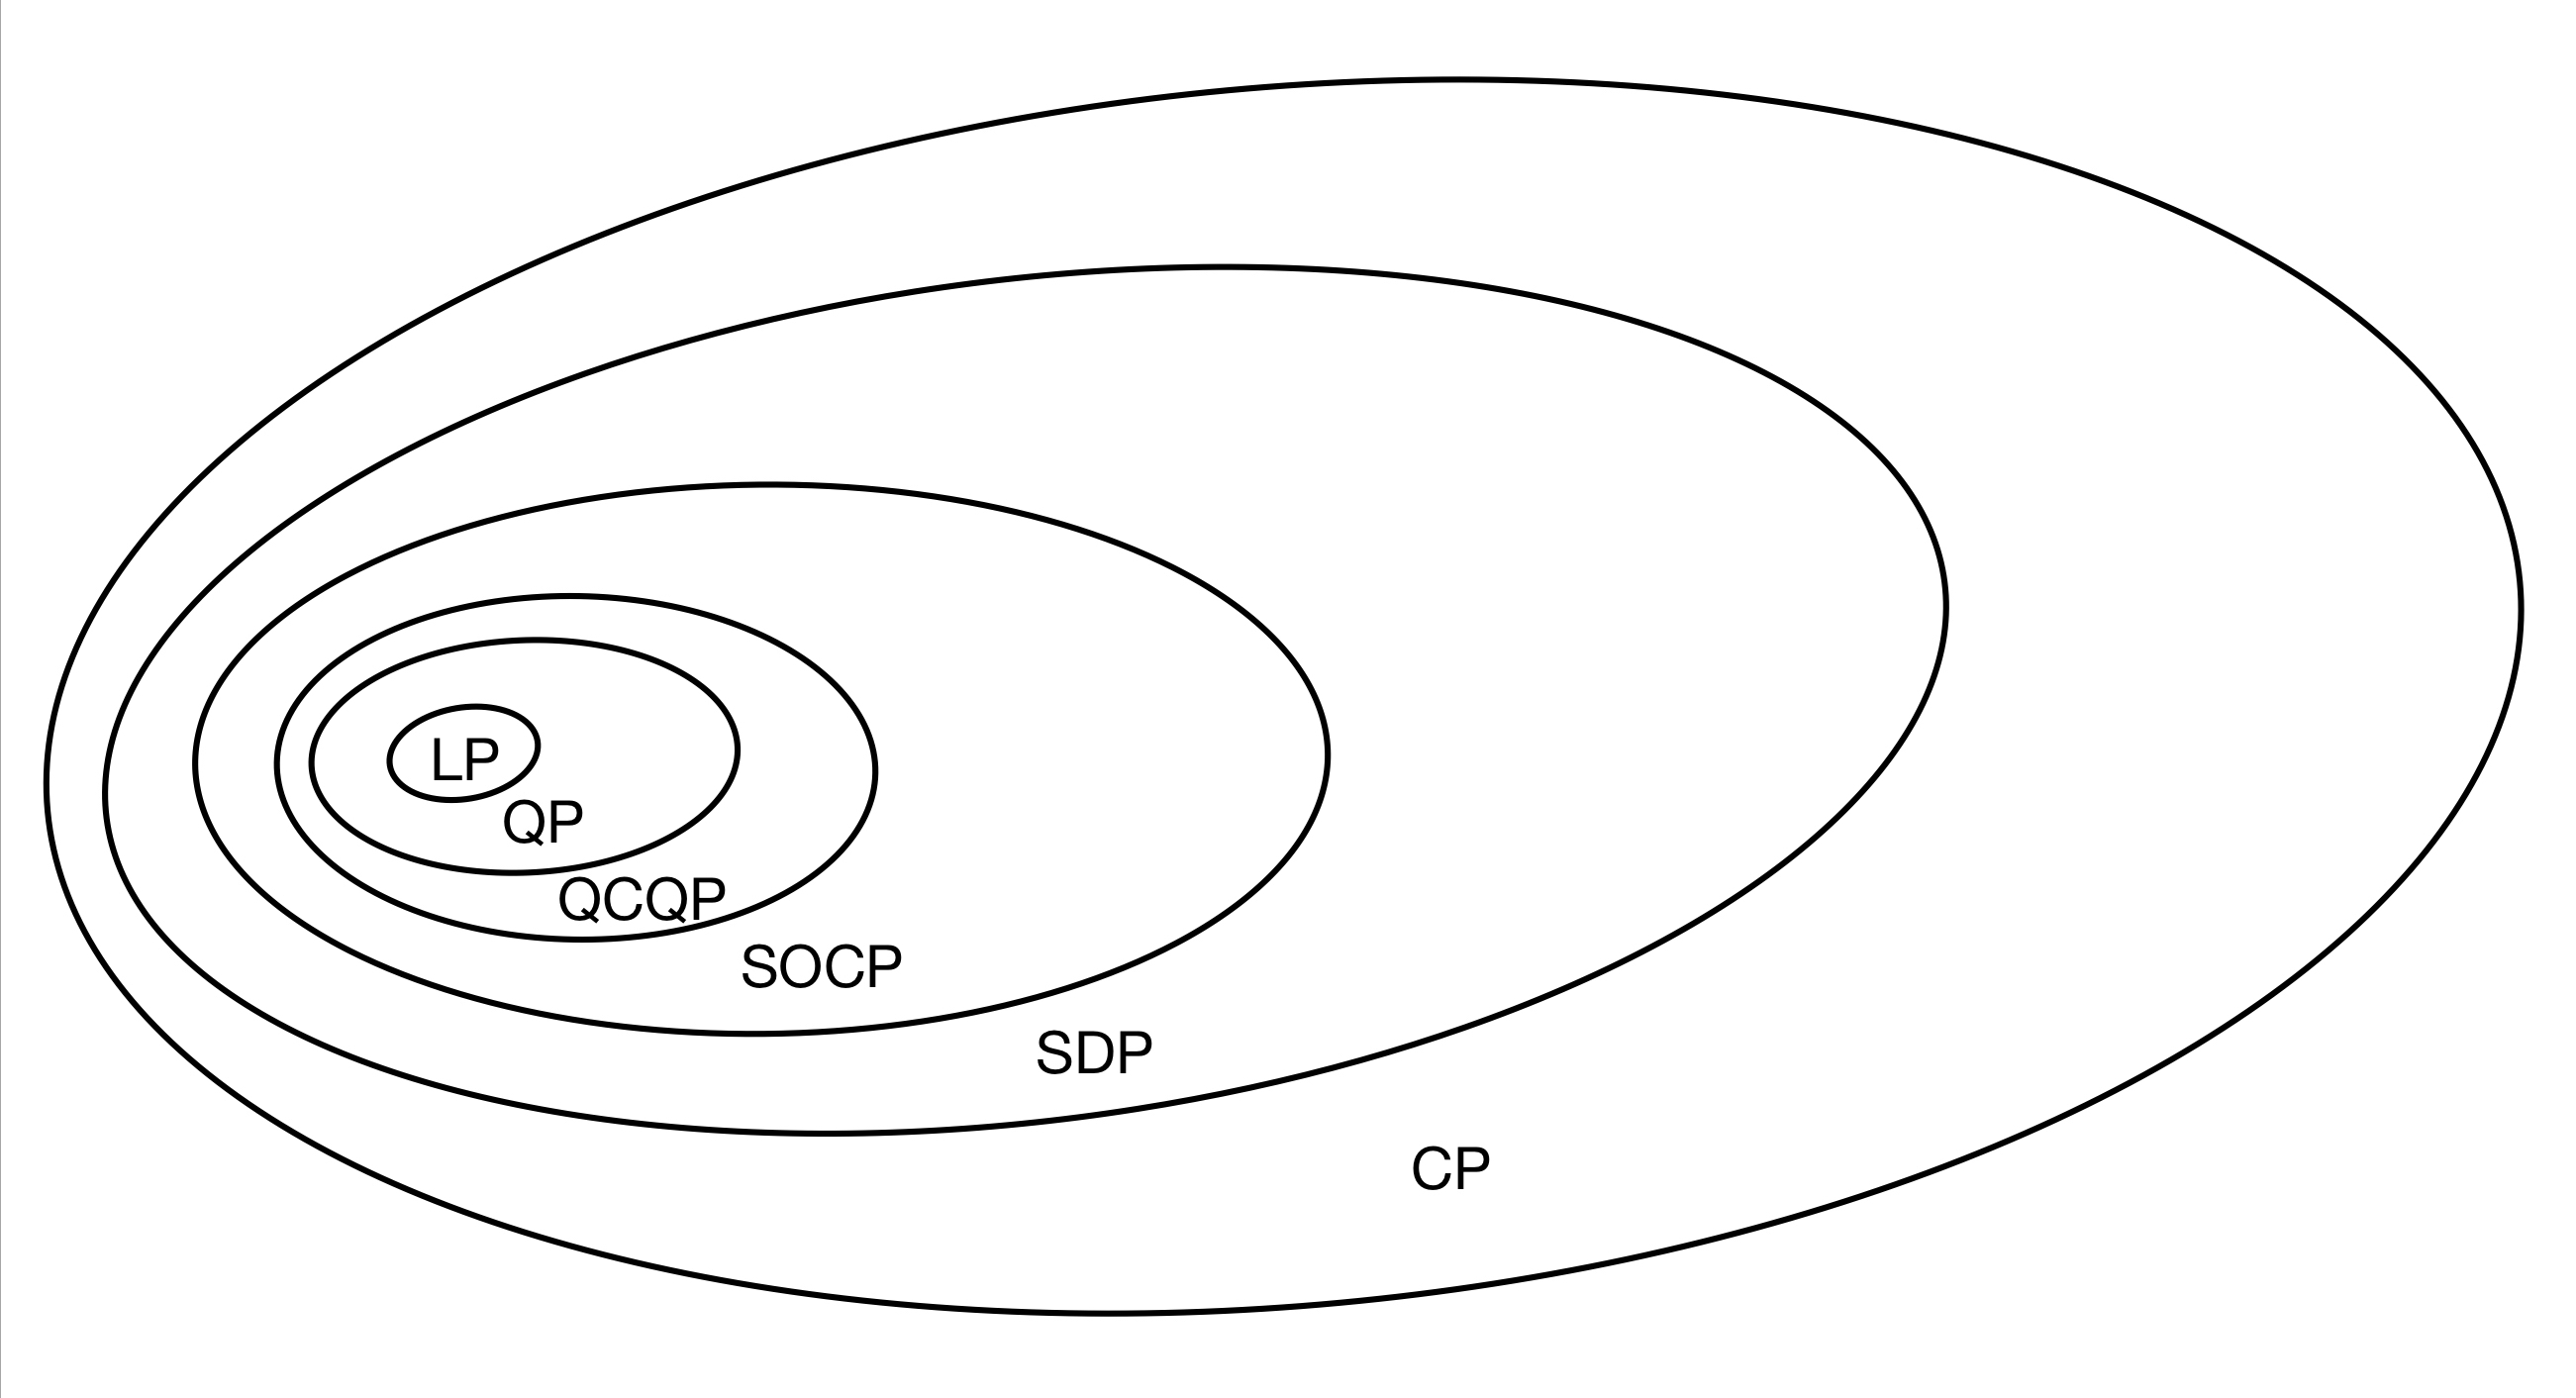

### Linear Programming (LP)
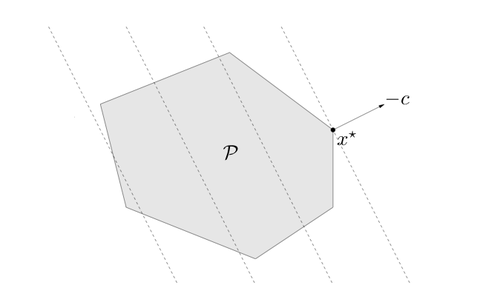
- slack variable : ineqaulity -> eqauilty 로 변경
- 이미지에서 왜 맨 오른쪽이 최소화 일까? Gx<h의 의미가 뭘까?

- example
  - diet problem
  - Basis persuit
   : non-convex가 되는 이유는 바로 목적함수로 사용되는 norm 때문이다. norm이 sparsity를 높이는 성질에 착안하여 이를 norm 대신 목적함수로 사용하면 문제를 convex로 만들어 솔루션을 근사할 수 있다. 우리는 이러한 방식을 basis pursuit라고 부른다.
    : 베터0norm을 베타1norm으로 변경
    
    : norm이 sparsity를 높이는 성질에 착안 : https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/#four
 
  - Dantzig selector
    : 

### Quadratic Programming (QP)

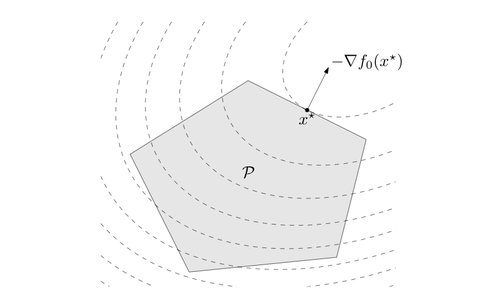

- 이미지에서 중앙에서 점점 커져서 오른쪽이 최소화 인지 확인 필요

### Second-Order Cone Programming (SOCP)
- 직관적 해석 파악필요
https://cvxopt.org/examples/mlbook/ubsdp.html

Consider a standard form SDP with an added upper bound

(1)¶\begin{array}{ll}
\mbox{minimize}   & \mathbf{Tr}(BX) \\
\mbox{subject to} & \mathbf{Tr}(A_iX) + c_i = 0, \quad i =
                     1,\ldots, n \\
                  & 0 \preceq X \preceq I
\end{array}

with variable X in {S}^m. The problem (1) can be reformulated by introducing a slack variable S

(2)¶\begin{array}{ll}
\mbox{minimize}   & \mathbf{Tr}(BX) \\
\mbox{subject to} & \mathbf{Tr}(A_iX) + c_i = 0, \quad i =
                     1,\ldots, n \\
                  & X + S = I \\
                  & X \succeq 0, \ S \succeq 0.
\end{array}




In [3]:
from cvxopt import matrix, normal, spdiag, misc, lapack
from ubsdp import ubsdp

m, n = 50, 50
A = normal(m**2, n)

# Z0 random positive definite with maximum e.v. less than 1.0.
Z0 = normal(m,m)
Z0 = Z0 * Z0.T
w = matrix(0.0, (m,1))
a = +Z0
lapack.syev(a, w, jobz = 'V')
wmax = max(w)
if wmax > 0.9:  w = (0.9/wmax) * w
Z0 = a * spdiag(w) * a.T

# c = -A'(Z0)
c = matrix(0.0, (n,1))
misc.sgemv(A, Z0, c, dims = {'l': 0, 'q': [], 's': [m]}, trans = 'T', alpha = -1.0)

# Z1 = I - Z0
Z1 = -Z0
Z1[::m+1] += 1.0

x0 = normal(n,1)
X0 = normal(m,m)
X0 = X0*X0.T
S0 = normal(m,m)
S0 = S0*S0.T
# B = A(x0) - X0 + S0
B = matrix(A*x0 - X0[:] + S0[:], (m,m))

X = ubsdp(c, A, B)

     pcost       dcost       gap    pres   dres   k/t
 0: -1.8012e+01 -1.8012e+01  4e+03  1e+00  7e-16  1e+00
 1:  9.3162e+02  9.3580e+02  8e+02  3e-01  6e-15  4e+00
 2:  1.2341e+03  1.2348e+03  1e+02  4e-02  4e-15  7e-01
 3:  1.2892e+03  1.2893e+03  1e+01  4e-03  4e-15  8e-02
 4:  1.2943e+03  1.2943e+03  2e+00  6e-04  4e-15  1e-02
 5:  1.2951e+03  1.2951e+03  2e-01  7e-05  5e-15  2e-03
 6:  1.2952e+03  1.2952e+03  1e-02  4e-06  5e-15  1e-04
 7:  1.2952e+03  1.2952e+03  5e-04  2e-07  5e-15  5e-06
 8:  1.2952e+03  1.2952e+03  5e-05  2e-08  4e-15  5e-07
Optimal solution found.
